In [41]:
#Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [42]:
arquivo = pd.read_csv('linkedin_datascience_jobs.csv')

In [43]:
df = pd.DataFrame(arquivo)
df

title  \
0   Consultor Performance Neg√≥cios (Cientista / Da...   
1                           Cientista de Dados Senior   
2                Data Scientist | Marketing Analytics   
3   Banco de Talentos - Profissionais com Defici√™ncia   
4                            Gestor de Tr√°fego S√™nior   
5   Cientista de Dados Jr. - TI - Data & Analytics...   
6                               Cientista de Dados JR   
7                         Cientista de Dados - J√∫nior   
8                               Cientista de Dados JR   
9   Pessoa Cientista de Dados - Vaga afirmativa pa...   
10  Est√°gio em Cientista de Dados - Vaga afirmativ...   
11        Cientista de Dados Senior¬†I Banco Carrefour   
12                          Cientista de Dados S√™nior   
13  Pessoa Consultora Cientista de Dados I Banco C...   
14                           Cientista de Dados Pleno   
15                                 Cientista de Dados   
16                              Cientista de Dados SR   
17  Cientista de Dados Pleno (Desenvolvimento de P...   
18                    Cientista de Dados Especialista   
19                           Cientista de Dados Pleno   
20                                 Cientista de dados   
21                          Cientista de Dados S√™nior   
22                                 Cientista de Dados   
23                    Cientista de Dados S√™nior | CRM   
24                   Pessoa Cientista de Dados S√™nior   
25                                 Cientista de dados   
26                          Cientista de Dados S√™nior   
27                     Cientista de Dados Pl - Brasil   
28   Pessoa Coordenadora Cientista de Dados | Cr√©dito   
29                          Cientista de Dados S√™nior   
30  ESPECIALISTA EM INOVA√á√ÉO DIGITAL (CIENTISTA DE...   
31                           Cientista de Dados Pleno   
32                                 Cientista de dados   
33  Cientista de Dados e Analytics S√™nior (Cr√©dito...   
34                              Cientista de dados sr   
35            Trainee Data Science | Data Masters DP6   
36  BRA Espec Riscos Credito I - (Afirmativa Pesso...   
37               Trainee data science data masters dp   
38                            Business Inteligence PL   
39  Engenheiro de Dados - Trabalho Remoto | REF#25...   

                    company            location        posted  \
0                SulAm√©rica       S√£o Paulo, SP     H√° 4 dias   
1               CSU Digital         Barueri, SP      H√° 1 m√™s   
2                       DP6       S√£o Paulo, SP     H√° 6 dias   
3                 Cognizant  S√£o Paulo e Regi√£o     H√° 5 dias   
4                V4 Company       S√£o Paulo, SP     H√° 4 dias   
5           Alares Internet       S√£o Paulo, SP      H√° 1 m√™s   
6   Mitsui Sumitomo Seguros       S√£o Paulo, SP  H√° 3 semanas   
7                       IBM       S√£o Paulo, SP  H√° 2 semanas   
8   Mitsui Sumitomo Seguros  S√£o Paulo e Regi√£o  H√° 3 semanas   
9                  Artefact       S√£o Paulo, SP    H√° 6 horas   
10                 Artefact       S√£o Paulo, SP     H√° 4 dias   
11   Grupo Carrefour Brasil       S√£o Paulo, SP  H√° 3 semanas   
12                 Bradesco          Osasco, SP     H√° 4 dias   
13   Grupo Carrefour Brasil       S√£o Paulo, SP  H√° 3 semanas   
14                       EY       S√£o Paulo, SP   H√° 17 horas   
15     UltraCon Consultoria       S√£o Paulo, SP     H√° 4 dias   
16         Banco Sofisa S/A       S√£o Paulo, SP      H√° 1 m√™s   
17               TransUnion       S√£o Paulo, SP     H√° 4 dias   
18                    Porto       S√£o Paulo, SP     H√° 3 dias   
19                    Porto       S√£o Paulo, SP   H√° 1 semana   
20    BRQ Digital Solutions       S√£o Paulo, SP  H√° 4 semanas   
21                    Porto       S√£o Paulo, SP  H√° 2 semanas   
22                  ti inc.  S√£o Paulo e Regi√£o      H√° 1 m√™s   
23                  C6 Bank       S√£o Paulo, SP     H√° 5 dias   
24           

In [44]:
def extrair_senioridade(texto):
    texto = texto.lower()
    if "s√™nior" in texto or "senior" in texto:
        return "S√™nior"
    elif "pleno" in texto:
        return "Pleno"
    elif "j√∫nior" in texto or "junior" in texto:
        return "J√∫nior"
    elif "estagiario" in texto or "estagi√°rio" in texto:
        return "Estagi√°rio"
    else:
        return "N√£o especificado"

In [45]:
df["titulo_descr"] = df["title"].fillna("") + " " + df["description"].fillna("")

In [46]:
df["senioridade"] = df["titulo_descr"].apply(extrair_senioridade)

In [47]:
print(df["senioridade"].value_counts())

senioridade
N√£o especificado    19
S√™nior              12
Pleno                7
J√∫nior               2
Name: count, dtype: int64


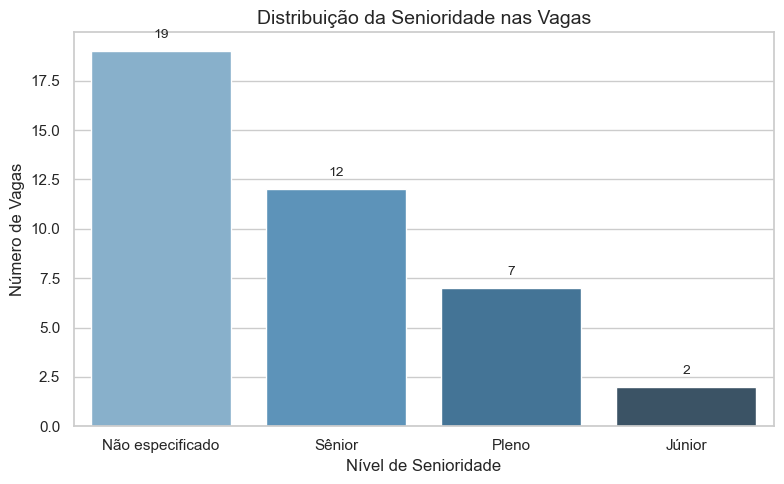

In [48]:
# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Gr√°fico de barras
sns.countplot(x="senioridade", data=df, order=df["senioridade"].value_counts().index, palette="Blues_d")

# T√≠tulo e r√≥tulos
plt.title("Distribui√ß√£o da Senioridade nas Vagas", fontsize=14)
plt.xlabel("N√≠vel de Senioridade")
plt.ylabel("N√∫mero de Vagas")

# Exibir valores em cima das barras
for i, count in enumerate(df["senioridade"].value_counts()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [49]:
def extrair_idioma(texto):
    texto = texto.lower()
    if "ingles" in texto or "ingl√™s" in texto:
        return "Ingl√™s"
    elif "espanhol" in texto:
        return "Espanhol"
    else:
        return "N√£o especificado"

In [50]:
df["idioma"] = df["description"].apply(extrair_idioma)

In [51]:
print(df["idioma"].value_counts())

idioma
N√£o especificado    24
Ingl√™s              16
Name: count, dtype: int64


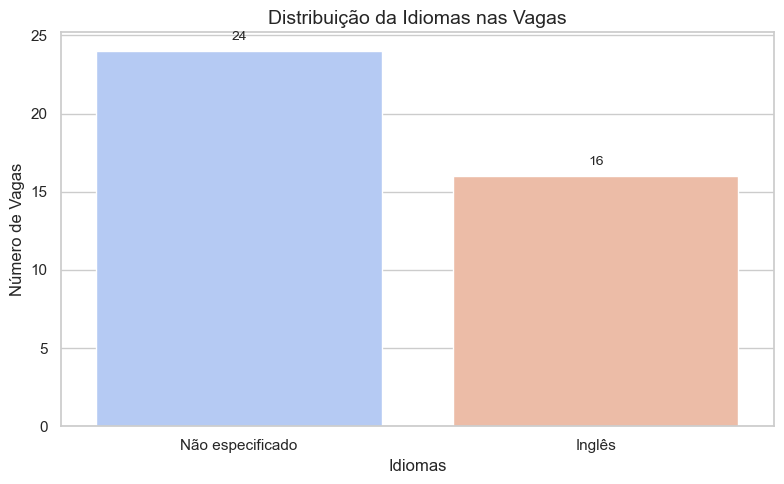

In [52]:
# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Gr√°fico de barras
sns.countplot(x="idioma", data=df, order=df["idioma"].value_counts().index, palette="coolwarm")

# T√≠tulo e r√≥tulos
plt.title("Distribui√ß√£o da Idiomas nas Vagas", fontsize=14)
plt.xlabel("Idiomas")
plt.ylabel("N√∫mero de Vagas")

# Exibir valores em cima das barras
for i, count in enumerate(df["idioma"].value_counts()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [53]:
def extrair_certificado(texto):
    texto = texto.lower()
    if "azure" in texto:
        return "Microsoft Azure"
    elif "aws" in texto:
        return "Amazon Web Service"
    elif "google" in texto or "gcp" in texto:
        return "Google Cloud"
    else:
        return "N√£o especificado"

In [54]:
df["certificado"] = df["description"].apply(extrair_certificado)
print(df["certificado"].value_counts())

certificado
N√£o especificado      23
Google Cloud           9
Microsoft Azure        6
Amazon Web Service     2
Name: count, dtype: int64


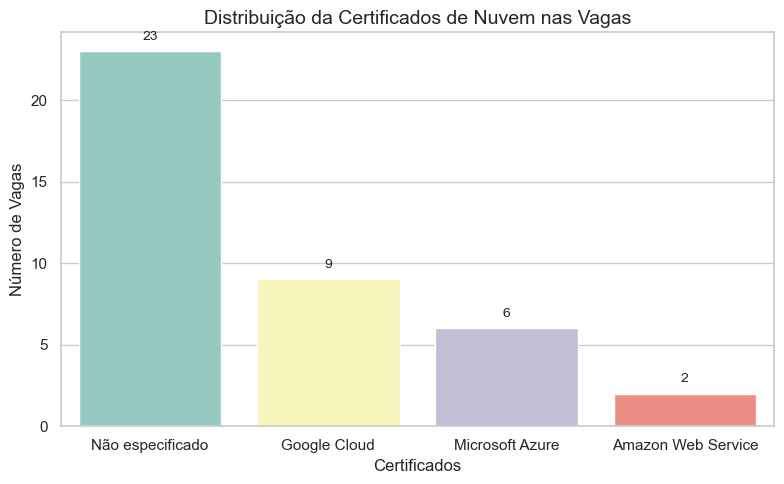

In [56]:
# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Gr√°fico de barras
sns.countplot(x="certificado", data=df, order=df["certificado"].value_counts().index, palette="Set3")

# T√≠tulo e r√≥tulos
plt.title("Distribui√ß√£o da Certificados de Nuvem nas Vagas", fontsize=14)
plt.xlabel("Certificados")
plt.ylabel("N√∫mero de Vagas")

# Exibir valores em cima das barras
for i, count in enumerate(df["certificado"].value_counts()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()